# Real Estate Price Predictor
Welcome to my real estate price predictor! I've taken the home price dataset of Boston home information.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### The Dataset
The column data:
* CRIM: Per capita crime rate by town.
* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: Proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* NOX: Nitric oxides concentration (parts per 10 million).
* RM: Average number of rooms per dwelling.
* AGE: Proportion of owner-occupied units built prior to 1940.
* DIS: Weighted distances to five Boston employment centers.
* RAD: Index of accessibility to radial highways.
* TAX: Full-value property-tax rate per $10,000.
* PTRATIO: Pupil-teacher ratio by town.
* B: 1000(Bk−0.63)2 where Bk is the proportion of black people by town (this is an incredibly odd column).
* LSTAT: % lower status of the population.
* MEDV: Median value of owner-occupied homes in $1000s (target variable).

In [14]:
# Assuming you have the CSV file in the same directory as your notebook
data = pd.read_csv('./data/data.csv')

print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### Clean dataset
The dataset has some missing values that need cleaned.

In [15]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values (if any)
data.fillna(method='ffill', inplace=True) # Example to forward-fill missing values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/var/folders/fp/kzc56h192vq0rmy1w4qrsddc0000gn/T/ipykernel_26423/1948908504.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True) # Example to forward-fill missing values


### Visualization
Draw Histograms and Heatmaps of the data.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.286611   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.701099   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082325    0.000000    5.190000    0.000000    0.449000    5.886000   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.627000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.616243    3.783876    9.485323  407.440313   18.500000  356.600900   
std     28.099130    2.0986

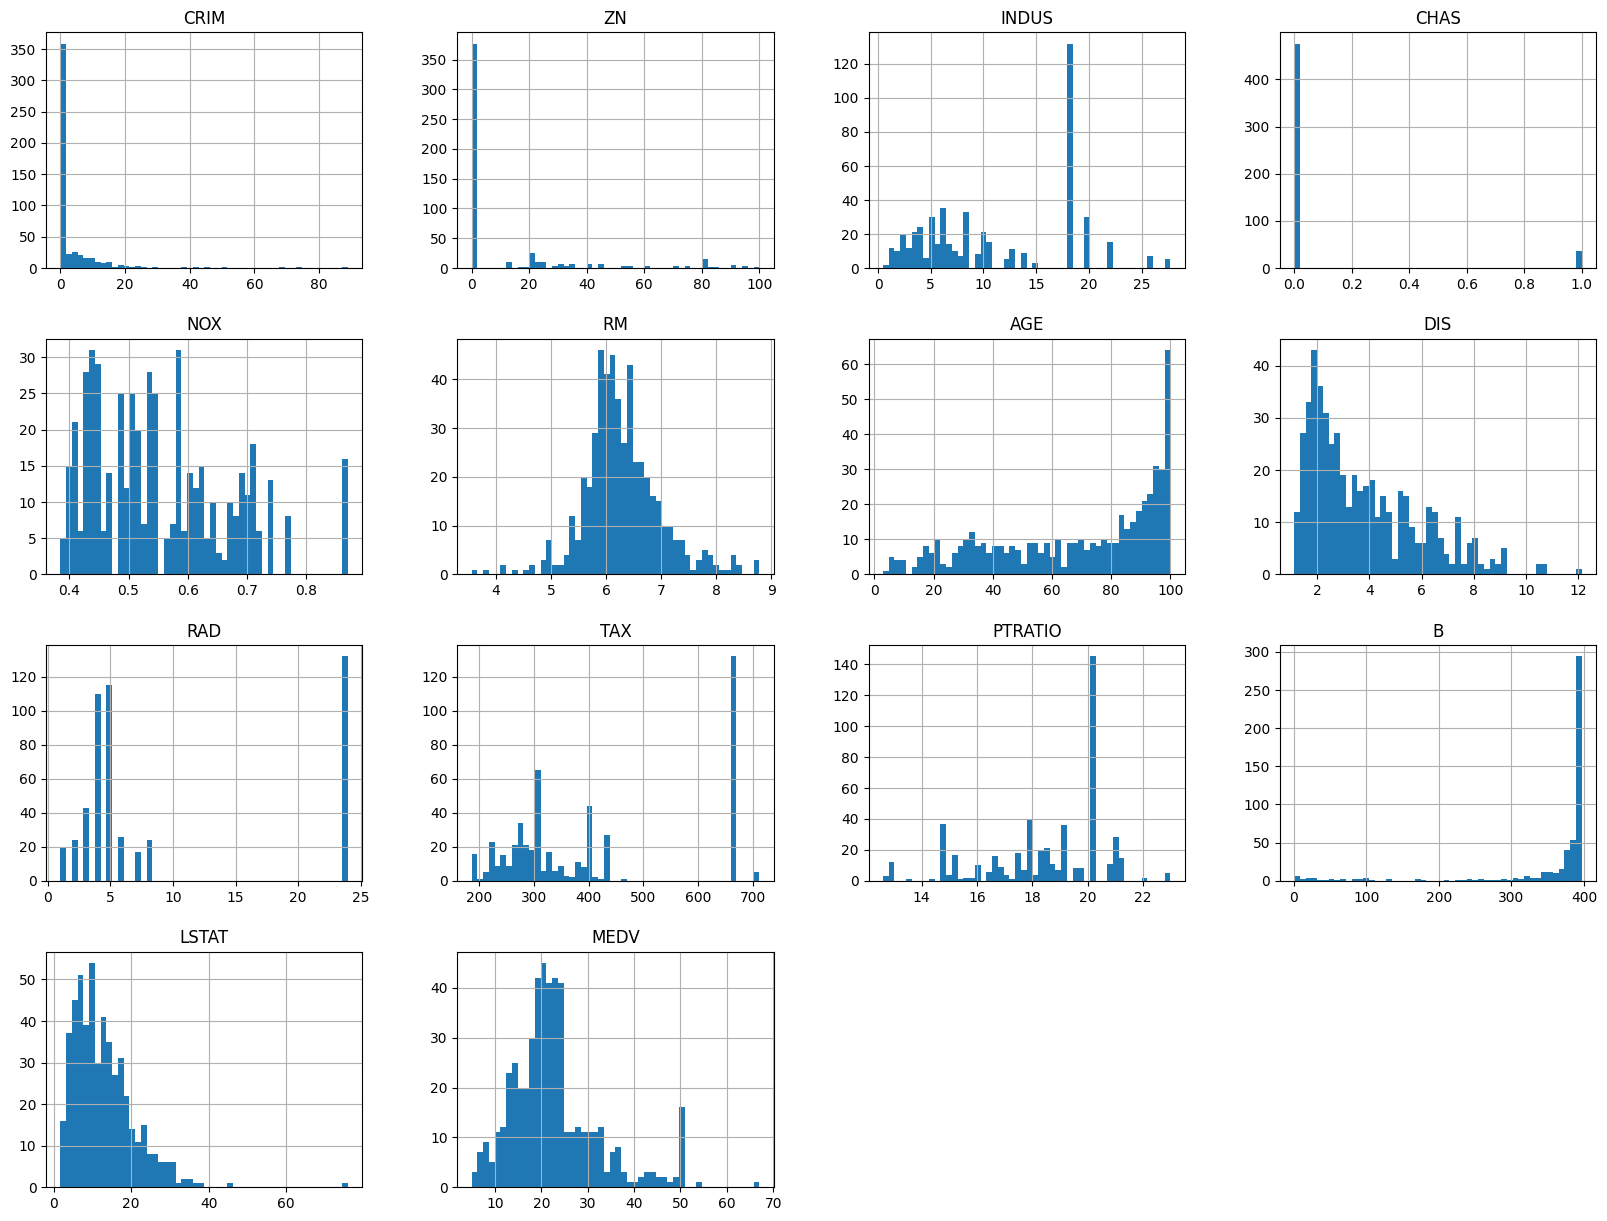

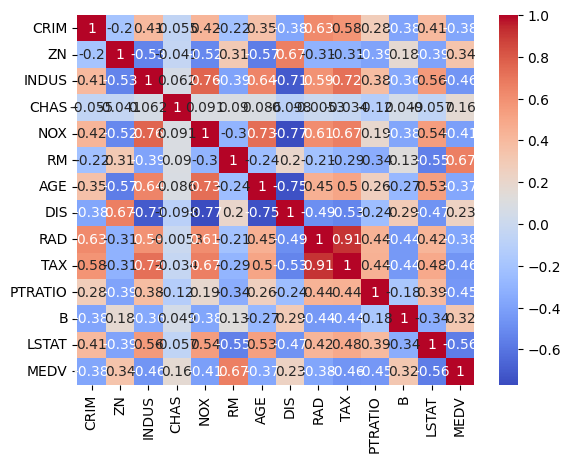

In [16]:
# Summary statistics
print(data.describe())

# Histograms for each feature
data.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Split the features and target
X is the dataset minus MEDV, and Y is MEDV. Split the data into training sets and testing sets.

In [17]:
# Split the features and target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression
Make a linear regression model and fit it

In [18]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

### Predict
Make a prediction on the model using X_test then print MSE and R2S

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)
# print(X_test)

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 71.12919494115172
R^2 Score: 0.17005233648438278


### Scatter Plot
Draw a scatterplot of theof the test prices and predictions

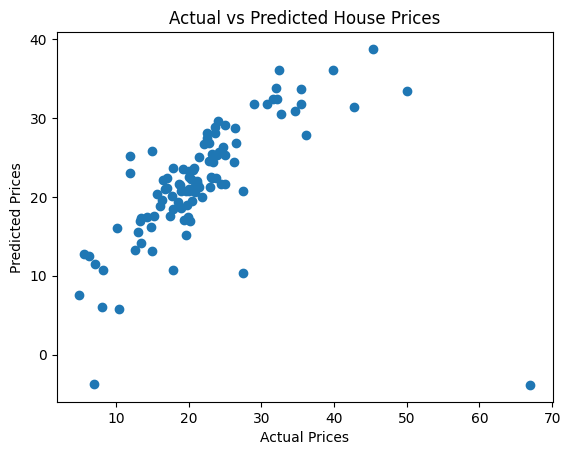

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


### Residuals
Calculate residuals and plot them

/var/folders/fp/kzc56h192vq0rmy1w4qrsddc0000gn/T/ipykernel_26423/1350594610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


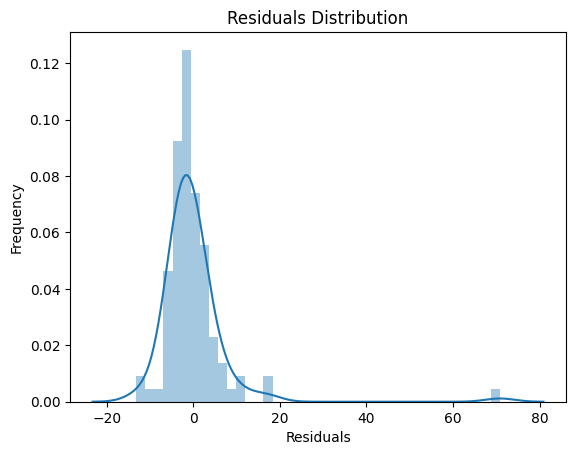

In [21]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



## Test it out

### More Testing
Test out the model with more test data.

In [22]:
sample_data = pd.read_csv('./data/sample_data.csv')
sample_data = sample_data.drop('MEDV', axis=1)

print(sample_data.head())

      CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  1.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [23]:
y_pred = model.predict(sample_data)

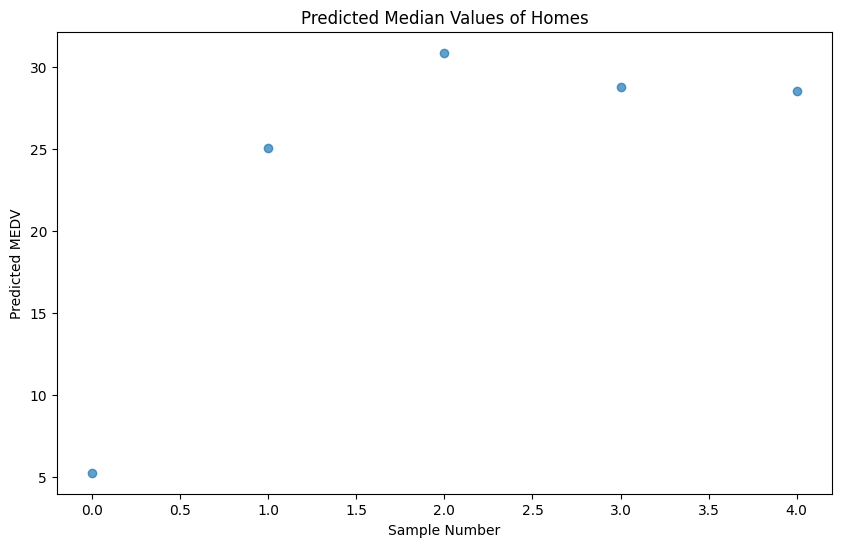

In [24]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, alpha=0.7)
plt.title("Predicted Median Values of Homes")
plt.xlabel("Sample Number")
plt.ylabel("Predicted MEDV")
plt.show()
